In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})
import matplotlib.pyplot as plt

import eqns

In [2]:
BV0 = [0.46,0.61,0.76,0.92,1.13,1.32,1.41,1.50,1.55,1.61]
BV1 = [0.61,0.75,0.92,1.12,1.31,1.41,1.49,1.55,1.60,1.95]
tau =[1.01, 1.08, 1.18, 1.32, 1.41, 1.49, 1.71, 1.94, 1.97, 2.12]

[ 0.51138488 -0.24907552  1.00734295]


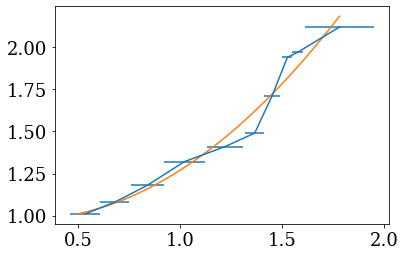

In [3]:
clr = (np.array(BV0) + np.array(BV1)) / 2.

plt.errorbar(clr, np.array(tau), xerr=clr-BV1)
ff = np.polyfit(clr, np.array(tau), 2)
plt.plot(np.arange(0.5,1.8,0.02), np.polyval(ff, np.arange(0.5,1.8,0.02)))

print(ff)

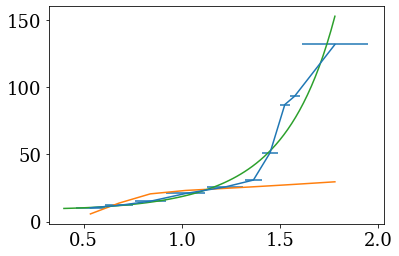

In [4]:
plt.errorbar(clr, 10**np.array(tau), xerr=clr-BV1)
plt.plot(clr, eqns.Noyes1984_eqn4(clr))

plt.plot(np.arange(0.4,1.8,0.02), 10**np.polyval(ff, np.arange(0.4,1.8,0.02)))

In [5]:
# def Wright2011_tau(BV):
#     BV0 = [0.46,0.61,0.76,0.92,1.13,1.32,1.41,1.50,1.55,1.61]
#     BV1 = [0.61,0.75,0.92,1.12,1.31,1.41,1.49,1.55,1.60,1.95]
    
#     clr = (np.array(BV0) + np.array(BV1)) / 2.
    
#     # tau =[1.01, 1.08, 1.18, 1.32, 1.41, 1.49, 1.71, 1.94, 1.97, 2.12]
    
#     ff = [0.51138488, -0.24907552, 1.00734295]
#     tau = 10**np.polyval(ff, BV)
    
#     return tau

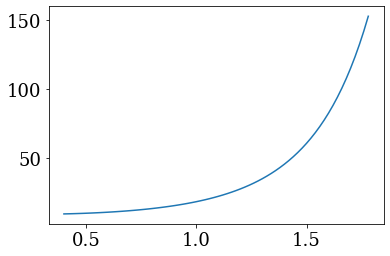

In [6]:
plt.plot(np.arange(0.4,1.8,0.02), eqns.Wright2011_tau(np.arange(0.4,1.8,0.02)))

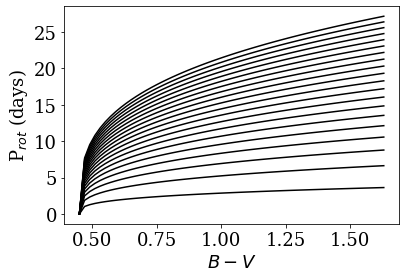

In [7]:
# plots to compare:

BV = np.arange(0.45, 1.65, 0.02)

t0 = 50
dt = 100
ages = np.arange(t0, 2000, dt)

for k in range(len(ages)):
    plt.plot(BV, eqns.Angus2015(BV,ages[k]), c='k')

plt.xlabel('$B-V$');
plt.ylabel('P$_{rot}$ (days)');

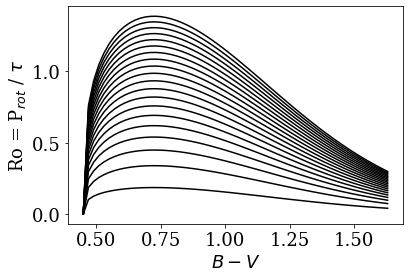

In [8]:

for k in range(len(ages)):
    plt.plot(BV, eqns.Angus2015(BV,ages[k]) / eqns.Wright2011_tau(BV), c='k')

plt.xlabel('$B-V$');
plt.ylabel(r'Ro = P$_{rot}$ / $\tau$');

In [9]:
def newspin(BV, age, Ro0 = 0.2, Ro1 = 0.5):
    '''
    let's imagine a break in the spin-down that occurs over a Rossby window
    i.e. spin-down works before and after as expected, and the star is stuck during the window
    
    This is kind of nonsense, since I define the Rossby number to continue declining, but it
    might draw the right kind of picture...
    '''
    
    Ro = eqns.Angus2015(BV, age) / eqns.Wright2011_tau(BV)
    
    Prot = np.piecewise(BV, [(Ro < Ro0), (Ro >= Ro0) & (Ro < Ro1), (Ro >= Ro1)], 
                        [lambda x: eqns.Angus2015(x, age), 
                         lambda x: Ro0 * eqns.Wright2011_tau(x), 
                         lambda x: eqns.Angus2015(x, age) - (Ro1 - Ro0) * eqns.Wright2011_tau(x)])
    return Prot

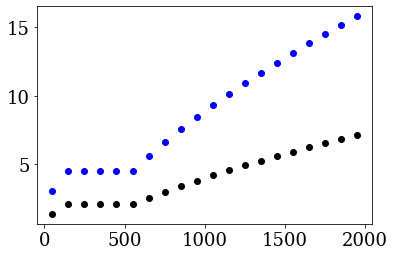

In [13]:
for k in range(len(ages)):
    plt.scatter(ages[k], newspin(.5, ages[k]), c='k')

for k in range(len(ages)):
    plt.scatter(ages[k], newspin(1.1, ages[k]), c='b')



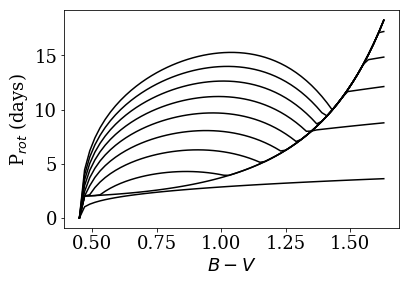

In [98]:
for k in range(0,len(ages),2):
    plt.plot(BV, newspin(BV, ages[k]), c='k')

plt.xlabel('$B-V$');
plt.ylabel('P$_{rot}$ (days)');

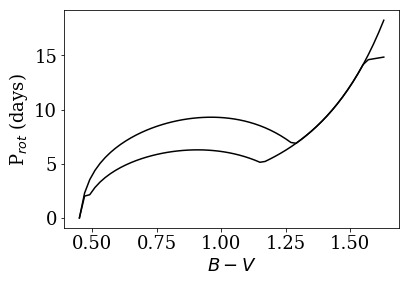

In [100]:
plt.plot(BV, newspin(BV, 650), c='k')
plt.plot(BV, newspin(BV, 1000), c='k')


plt.xlabel('$B-V$');
plt.ylabel('P$_{rot}$ (days)');